In [22]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

# EDA

In [23]:
#import clean data
df=pd.read_csv('data_clean4.csv')

In [24]:
#check df and columns info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17123 entries, 0 to 17122
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   numPhotos     17123 non-null  int64  
 1   price         17123 non-null  int64  
 2   propertyType  17123 non-null  object 
 3   size          17123 non-null  int64  
 4   rooms         17123 non-null  int64  
 5   bathrooms     17123 non-null  int64  
 6   municipality  17123 non-null  object 
 7   latitude      17123 non-null  float64
 8   longitude     17123 non-null  float64
 9   hasVideo      17123 non-null  bool   
 10  hasPlan       17123 non-null  bool   
 11  has3DTour     17123 non-null  bool   
 12  has360        17123 non-null  bool   
 13  hasStaging    17123 non-null  bool   
 14  floor         17123 non-null  int64  
 15  description   8788 non-null   object 
 16  hasLift       17123 non-null  object 
 17  parkingSpace  17123 non-null  int64  
 18  highlight     17123 non-nu

- 21 columns in total
- All columns have no empty values
- **house_status** is encoded as numeric , but should be analyzed as categorical
    - 2: already renewed
    - 1: in renovation
    - 0: good
    - -1: to renew
- **numPhotos** is encoded as numeric , but will be analyzed in Ad-Related features
- **highlight**, **parkingSpace** : turn to boolean
- **hasLift**: False to 0, then to boolean
- **longitude** and **latitude** will be deleted from df after vizualizing houses position and price

## Adjust some columns

In [25]:
#change highlight, parkingSpace to boolean
df['parkingSpace'] = df['parkingSpace'].astype(bool)
df['highlight'] = df['highlight'].astype(bool)

In [26]:
#turn hasLift to boolean
df['hasLift'] = df['hasLift'].replace('False', 0).astype(bool)
df['hasLift'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 17123 entries, 0 to 17122
Series name: hasLift
Non-Null Count  Dtype
--------------  -----
17123 non-null  bool 
dtypes: bool(1)
memory usage: 16.9 KB


In [27]:
#get Categorical columns

#cat columns list
cat_cols = list(df.select_dtypes(include=['object', 'bool']).columns)
cat_cols.append('house_status')
print(cat_cols)

#cat df
cat_df = df[cat_cols]
cat_df.info()

['propertyType', 'municipality', 'hasVideo', 'hasPlan', 'has3DTour', 'has360', 'hasStaging', 'description', 'hasLift', 'parkingSpace', 'highlight', 'city', 'house_status']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17123 entries, 0 to 17122
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   propertyType  17123 non-null  object
 1   municipality  17123 non-null  object
 2   hasVideo      17123 non-null  bool  
 3   hasPlan       17123 non-null  bool  
 4   has3DTour     17123 non-null  bool  
 5   has360        17123 non-null  bool  
 6   hasStaging    17123 non-null  bool  
 7   description   8788 non-null   object
 8   hasLift       17123 non-null  bool  
 9   parkingSpace  17123 non-null  bool  
 10  highlight     17123 non-null  bool  
 11  city          17123 non-null  object
 12  house_status  17123 non-null  int64 
dtypes: bool(8), int64(1), object(4)
memory usage: 802.8+ KB


- 11 columns
- most are related to the ad itself, not to the house features

## Ad-Related Features

In [28]:
#ad(post)-related COLUMNS
post_related_cols = ['hasVideo', 'hasPlan', 'has3DTour', 'has360', 'hasStaging', 'highlight', 'numPhotos']
#ad(post)-related DF
post_related_df = df[post_related_cols]

### Frequency analysis

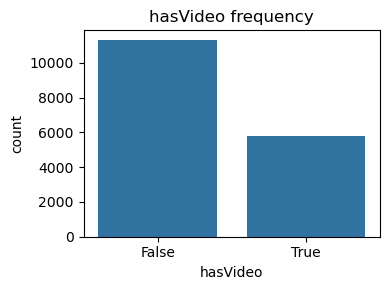

Percentage of True is 0.3394849033463762


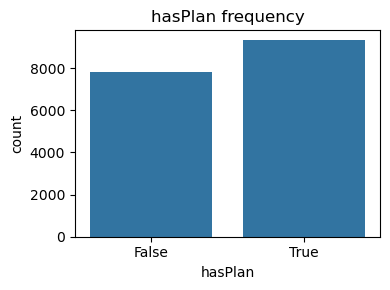

Percentage of True is 0.5447059510599778


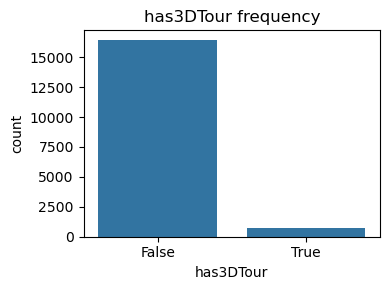

Percentage of True is 0.040471879927582784


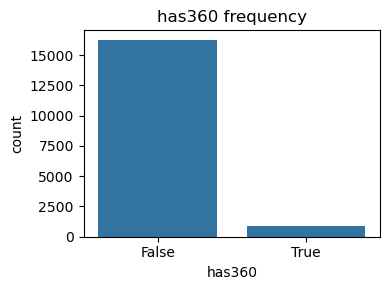

Percentage of True is 0.05209367517374292


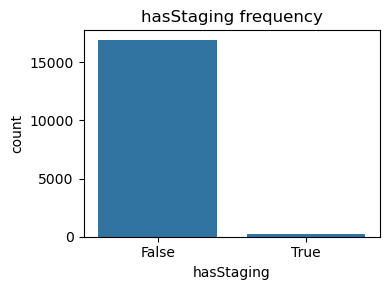

Percentage of True is 0.013315423699118145


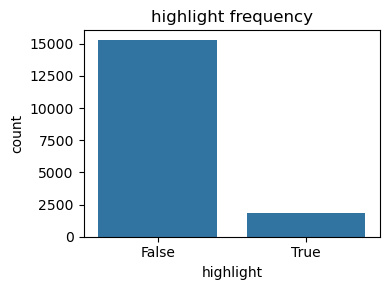

Percentage of True is 0.10798341412135724


In [29]:
#Graphs: are posts with 'special' features related to different prices 
for col in post_related_cols[:-1]: #no numPhotos
    #graph
    plt.figure(figsize=(4, 3))
    sns.countplot(x=df[col])
    plt.title(f'{col} frequency')
    plt.tight_layout()
    plt.show()

    #data
    print(f'Percentage of True is {df[col].mean()}')

- hasPlan (planta) is used by most users
- hasVideo is not used most of the times
- has3DTour, has360, hasStaging are features used rarely
- highlight is requested by aproximately 10% of users

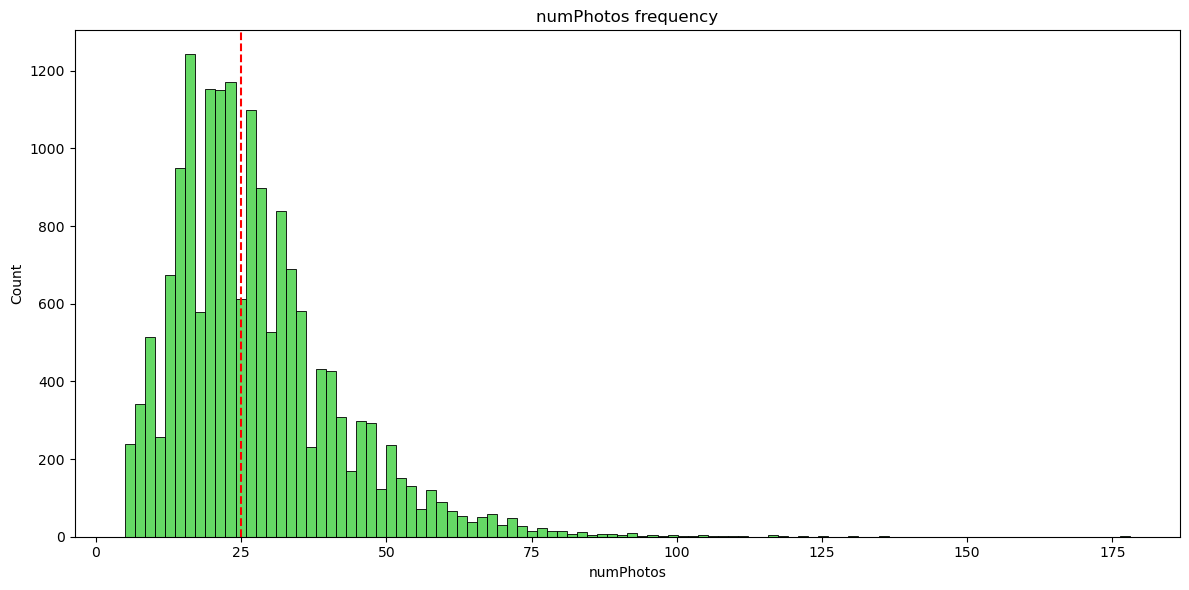

The median photos per house is 25.


In [30]:
#for numPhotos
col='numPhotos'
plt.figure(figsize=(12, 6))
sns.histplot(x=df[col], bins=100, color='#32CD32')

mediana = int(df[col].median())

# Desenha uma linha vertical na mediana
plt.axvline(mediana, color='red', linestyle='--', label=f'Mediana: {mediana}')

plt.title(f'{col} frequency')
plt.tight_layout()
plt.show()

print(f'The median photos per house is {mediana}.')

### Features vs Price

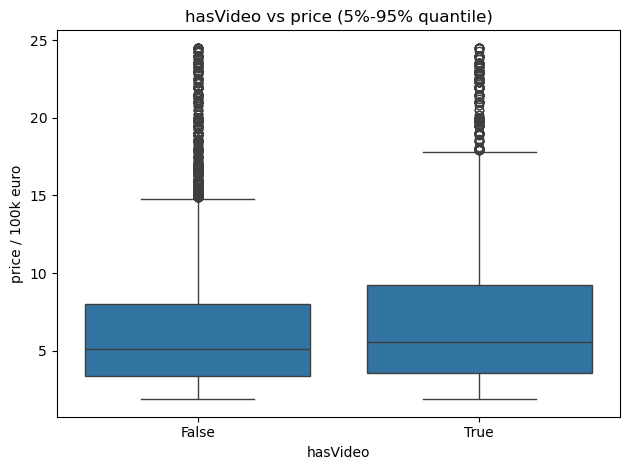

Prices (x1000 euro)


hasVideo
True     583.00
False    498.75
Name: price, dtype: float64

Difference: 84.25


C:\Users\nihon\AppData\Local\Temp\ipykernel_112560\2292027790.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Difference: {prices[0]-prices[1]}')


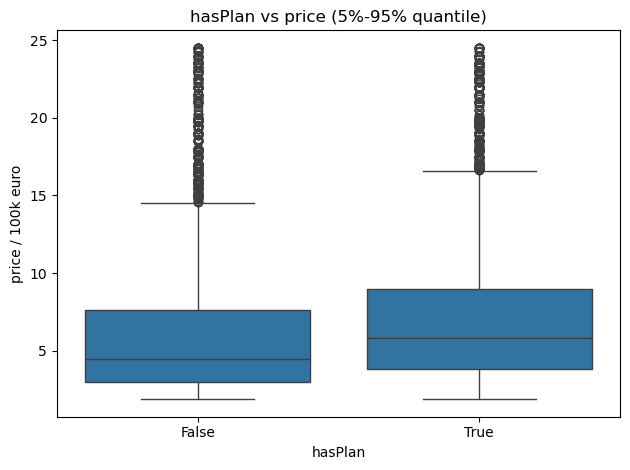

Prices (x1000 euro)


hasPlan
True     595.0
False    437.5
Name: price, dtype: float64

Difference: 157.5


C:\Users\nihon\AppData\Local\Temp\ipykernel_112560\2292027790.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Difference: {prices[0]-prices[1]}')


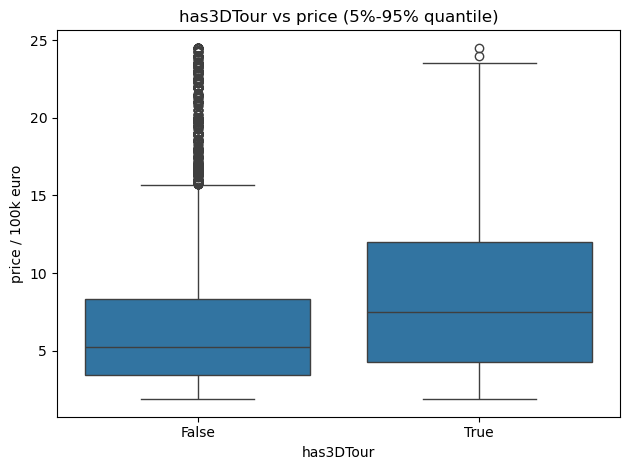

Prices (x1000 euro)


has3DTour
True     770.0
False    520.0
Name: price, dtype: float64

Difference: 250.0


C:\Users\nihon\AppData\Local\Temp\ipykernel_112560\2292027790.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Difference: {prices[0]-prices[1]}')


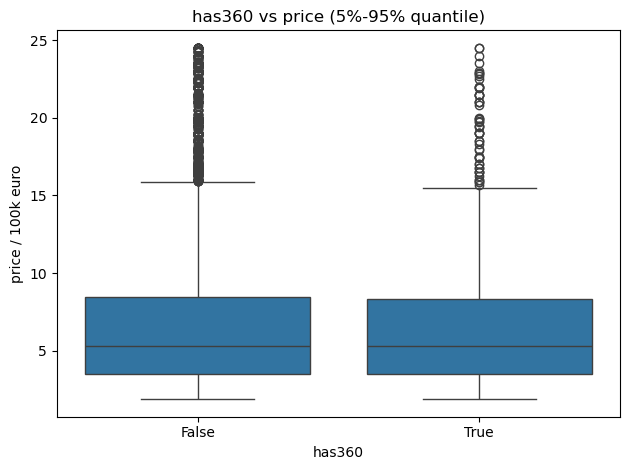

Prices (x1000 euro)


has360
True     543.5
False    530.0
Name: price, dtype: float64

Difference: 13.5


C:\Users\nihon\AppData\Local\Temp\ipykernel_112560\2292027790.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Difference: {prices[0]-prices[1]}')


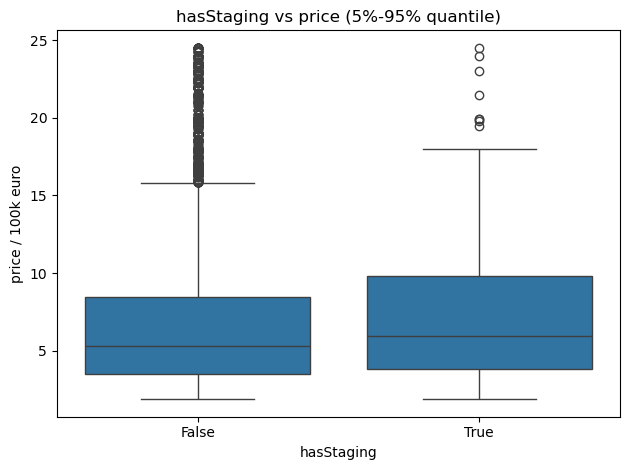

Prices (x1000 euro)


hasStaging
True     596.5
False    530.0
Name: price, dtype: float64

Difference: 66.5


C:\Users\nihon\AppData\Local\Temp\ipykernel_112560\2292027790.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Difference: {prices[0]-prices[1]}')


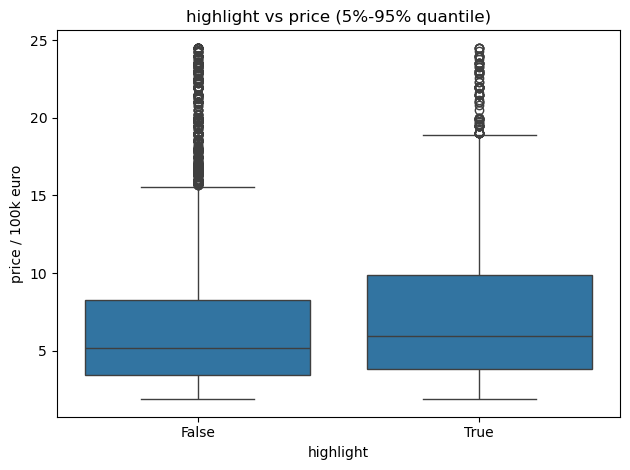

Prices (x1000 euro)


highlight
True     635.0
False    515.0
Name: price, dtype: float64

Difference: 120.0


C:\Users\nihon\AppData\Local\Temp\ipykernel_112560\2292027790.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Difference: {prices[0]-prices[1]}')


In [31]:
#Graphs
for col in post_related_cols[:-1]: #without numPhotos
    #temp_cols=[col, 'price']
    temp_df = pd.concat([df['price'],post_related_df[col]],axis=1)
    
    #get quantile extremes
    lower_quantile = temp_df['price'].quantile(0.05)
    upper_quantile = temp_df['price'].quantile(0.95)
    
    # Filter the data to show better the differences and avoid extreme values
    filtered_data = temp_df[(temp_df['price'] >= lower_quantile) & (temp_df['price'] <= upper_quantile)]

    #change scale of price to base 100.000 euros for graphing purposes
    filtered_data2 = filtered_data.copy() #to avoid warning messages
    filtered_data2['price'] =  filtered_data['price']/100000
    filtered_data2 = filtered_data2.rename(columns={'price': 'price / 100k euro'})
    
    sns.boxplot(data=filtered_data2, x=col, y='price / 100k euro')
    plt.title(f'{col} vs price (5%-95% quantile)')
    plt.tight_layout()
    plt.show()


    #show values in 1.000 euros
    print('Prices (x1000 euro)')
    prices = df.groupby(col)['price'].median().sort_values(ascending=False)/1000
    display(prices)
    print(f'Difference: {prices[0]-prices[1]}')

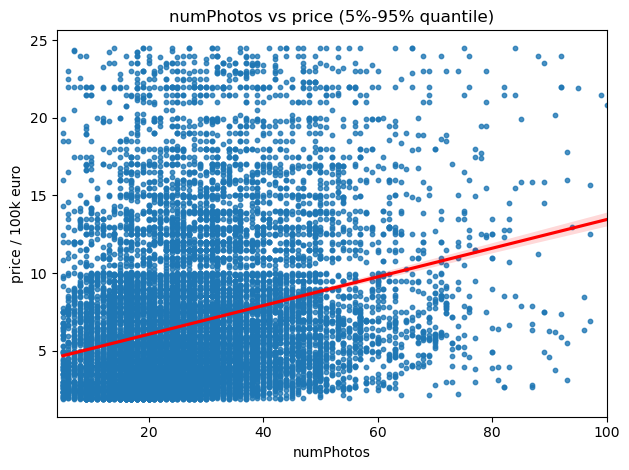

In [32]:
#improve numPhotos graph
#temp_cols=[col, 'price']
col = 'numPhotos'
temp_df = pd.concat([df['price'],post_related_df[col]],axis=1)

#get quantile extremes
lower_quantile = temp_df['price'].quantile(0.05)
upper_quantile = temp_df['price'].quantile(0.95)

# Filter the data to show better the differences and avoid extreme values
filtered_data = temp_df[(temp_df['price'] >= lower_quantile) & (temp_df['price'] <= upper_quantile)]

#change scale of price to base 100.000 euros for graphing purposes
filtered_data2 = filtered_data.copy() #to avoid warning messages
filtered_data2['price'] =  filtered_data['price']/100000
filtered_data2 = filtered_data2.rename(columns={'price': 'price / 100k euro'})

#filtered_data2.plot(kind='hexbin', x=col, y='price / 100k euro')
sns.regplot(data=filtered_data2, x=col, y='price / 100k euro',
           scatter_kws={'s': 10},
           line_kws={'color': 'red'},
            ci=95
           )
plt.title(f'{col} vs price (5%-95% quantile)')
plt.xlim(4,100)
#plt.ylim(1,100)
plt.tight_layout()
plt.show()

- There a clear tendency for a correlation of using more of the website's 'special' features when the house is more expensive

Let's analyze statistically.

In [33]:
#Analysis (Mann Whitney U): are posts with 'special' features related to different prices 
for col in post_related_df.columns[:-1]: #except numPhotos
    # Perform the Mann-Whitney U test
    group1 = df[post_related_df[col]==True]['price']
    group2 = df[post_related_df[col]==False]['price']

    median1 = int(group1.median())
    median2 = int(group2.median())
    
    stat, p = mannwhitneyu(group1, group2)
    print(f'{col} vs price: ')
    print(f'Median for True is {median1}, for False is {median2}, diference is {median1-median2}.')
    print('p-value:', p)
    print()

hasVideo vs price: 
Median for True is 583000, for False is 498750, diference is 84250.
p-value: 2.3317337314211712e-33

hasPlan vs price: 
Median for True is 595000, for False is 437500, diference is 157500.
p-value: 4.5691538538008305e-135

has3DTour vs price: 
Median for True is 770000, for False is 520000, diference is 250000.
p-value: 6.061307167645114e-31

has360 vs price: 
Median for True is 543500, for False is 530000, diference is 13500.
p-value: 0.14641494379562264

hasStaging vs price: 
Median for True is 596500, for False is 530000, diference is 66500.
p-value: 0.0020982012894407162

highlight vs price: 
Median for True is 635000, for False is 515000, diference is 120000.
p-value: 2.8003906283569726e-29



- Except for has360, ALL other features are mostly used for more expensive houses.

## Other categorical features

In [34]:
#get categories directly related to the house
direct_cat_cols = list(set(cat_cols) - set(post_related_cols))
print(post_related_cols)
print(list(cat_cols))
print(direct_cat_cols)

['hasVideo', 'hasPlan', 'has3DTour', 'has360', 'hasStaging', 'highlight', 'numPhotos']
['propertyType', 'municipality', 'hasVideo', 'hasPlan', 'has3DTour', 'has360', 'hasStaging', 'description', 'hasLift', 'parkingSpace', 'highlight', 'city', 'house_status']
['municipality', 'parkingSpace', 'description', 'house_status', 'city', 'propertyType', 'hasLift']


In [35]:
# further reduce
direct_cat_cols = ['propertyType', 'house_status', 'city', 'hasLift', 'municipality']

direct_cat_df = df[direct_cat_cols]

### Frequency analysis

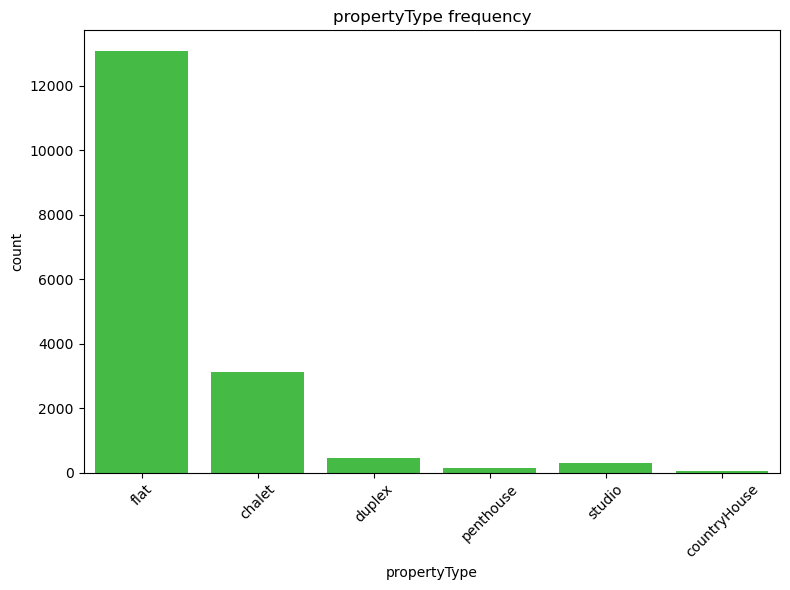

propertyType
flat            13064
chalet           3124
duplex            448
studio            289
penthouse         156
countryHouse       42
Name: count, dtype: int64

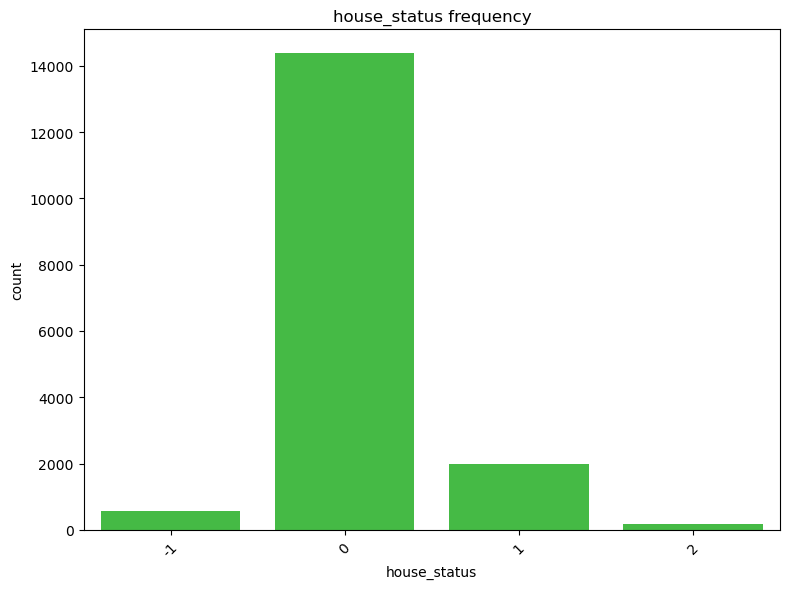

house_status
 0    14377
 1     1979
-1      575
 2      192
Name: count, dtype: int64

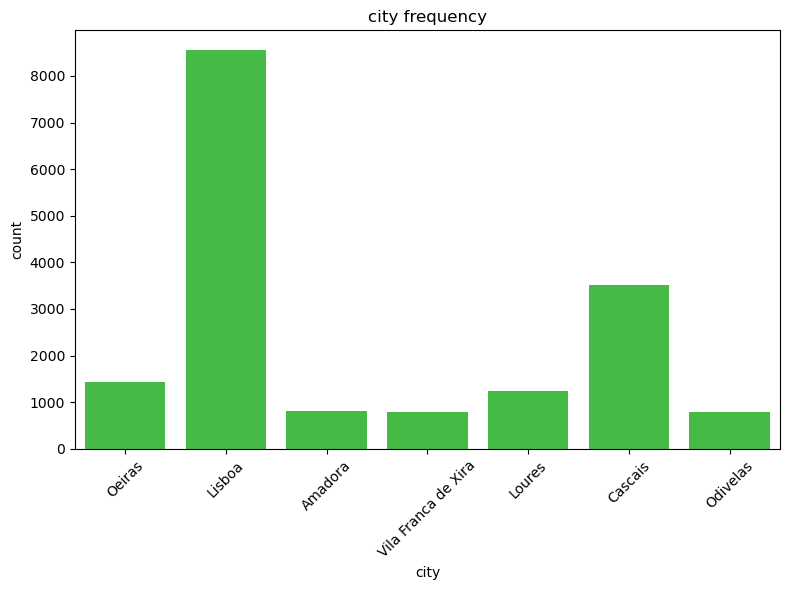

city
Lisboa                 8551
Cascais                3518
Oeiras                 1428
Loures                 1231
Amadora                 816
Odivelas                794
Vila Franca de Xira     785
Name: count, dtype: int64

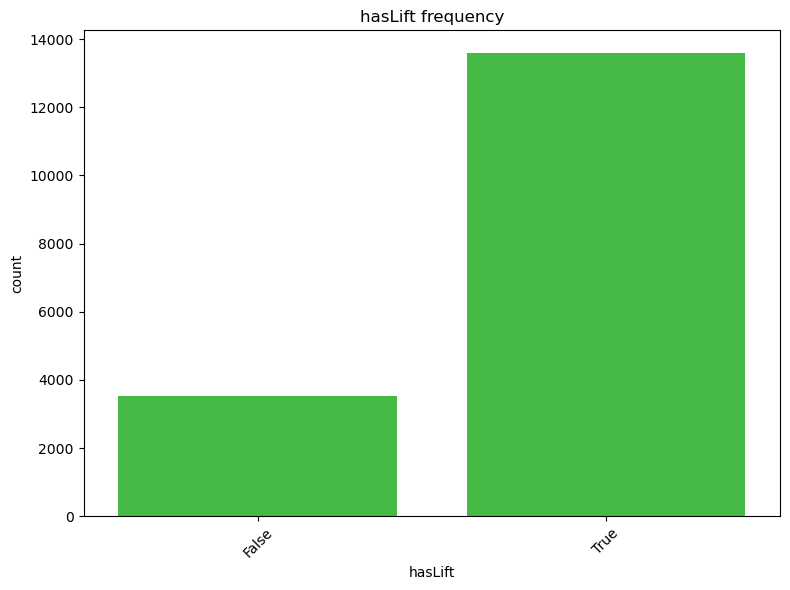

hasLift
True     13582
False     3541
Name: count, dtype: int64

In [36]:
#Graphs of frequency
for col in direct_cat_cols[:-1]: #without municipality
    plt.figure(figsize=(8, 6))
    sns.countplot(x=df[col], color='#32CD32')
    plt.title(f'{col} frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    #show values
    display(df[col].value_counts())

### Features vs Price

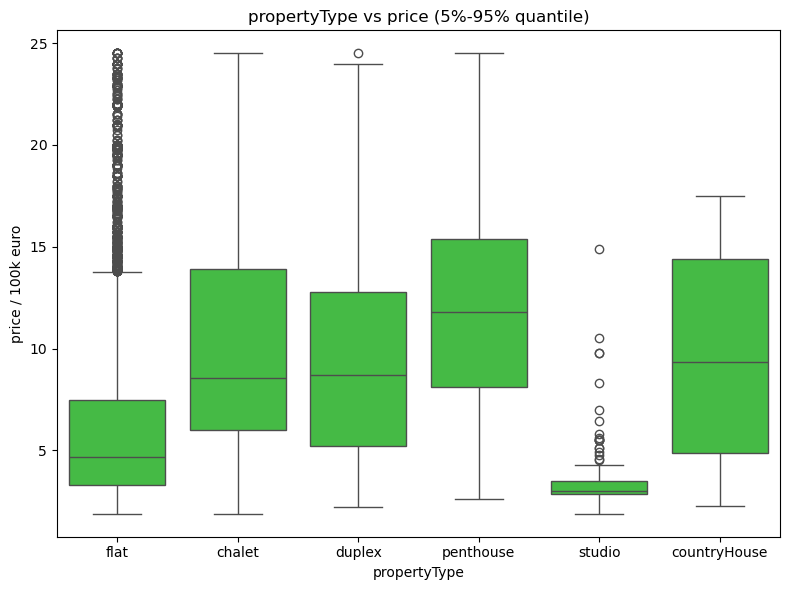

Prices (x1000 euro)


propertyType
countryHouse    1335.0
penthouse       1300.0
chalet          1000.0
duplex           915.0
flat             450.0
studio           295.0
Name: price, dtype: float64

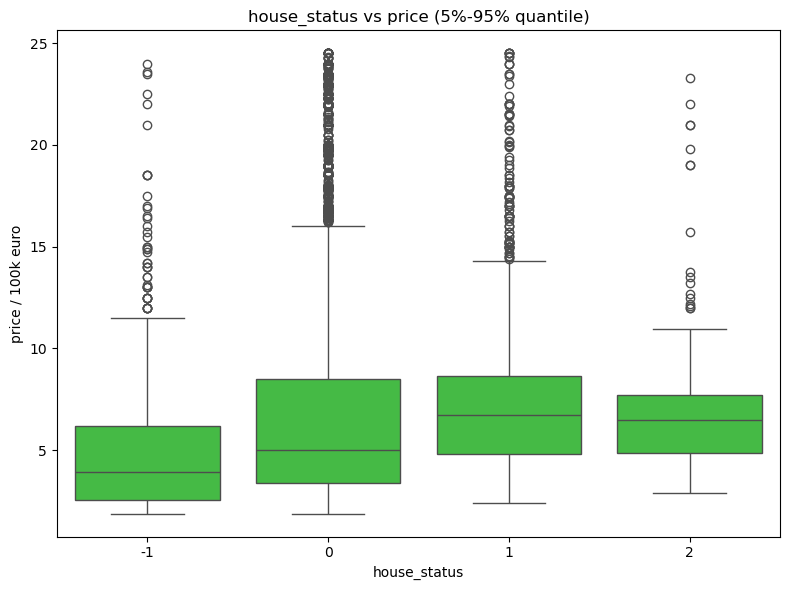

Prices (x1000 euro)


house_status
 1    685.0
 2    675.0
 0    498.0
-1    370.0
Name: price, dtype: float64

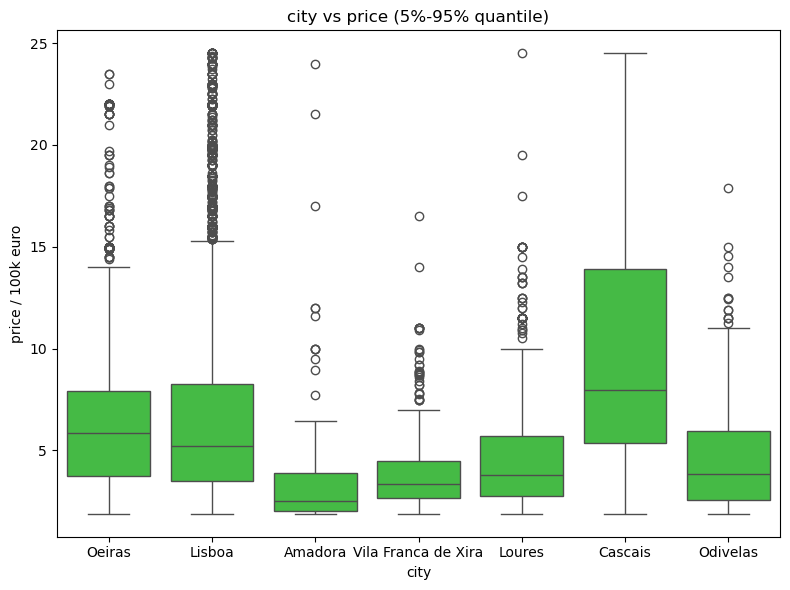

Prices (x1000 euro)


city
Cascais                970.0
Oeiras                 589.5
Lisboa                 530.0
Odivelas               359.9
Loures                 350.0
Vila Franca de Xira    270.0
Amadora                217.5
Name: price, dtype: float64

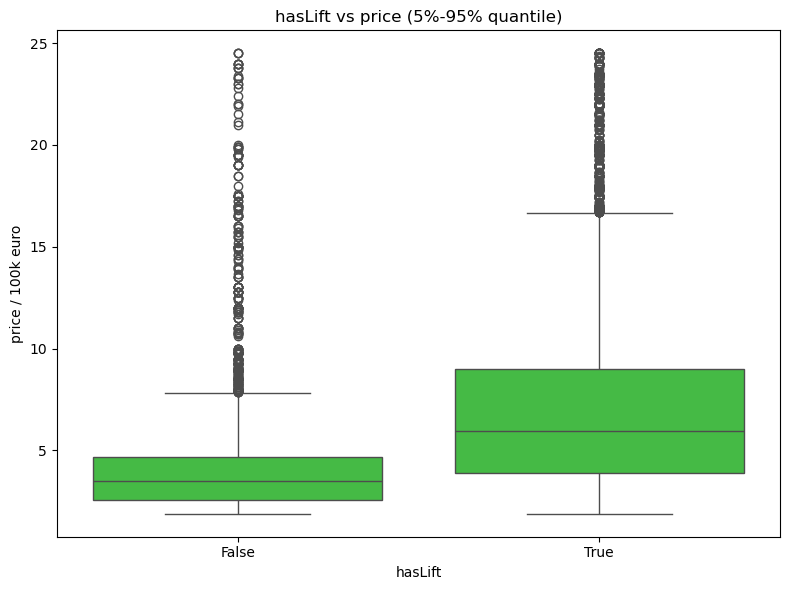

Prices (x1000 euro)


hasLift
True     600.0
False    329.0
Name: price, dtype: float64

In [37]:
#Graphs
for col in direct_cat_cols[:-1]: #no municipality
    #temp_cols=[col, 'price']
    temp_df = pd.concat([df['price'],df[col]],axis=1)
    
    #get quantile extremes
    lower_quantile = temp_df['price'].quantile(0.05)
    upper_quantile = temp_df['price'].quantile(0.95)
    
    # Filter the data to show better the differences and avoid extreme values
    filtered_data = temp_df[(temp_df['price'] >= lower_quantile) & (temp_df['price'] <= upper_quantile)]

    #change scale of price to base 100.000 euros for graphing purposes
    filtered_data2 = filtered_data.copy() #to avoid warning messages
    filtered_data2['price'] =  filtered_data['price']/100000
    filtered_data2 = filtered_data2.rename(columns={'price': 'price / 100k euro'})

    plt.figure(figsize=(8, 6))
    sns.boxplot(data=filtered_data2, x=col, y='price / 100k euro', color='#32CD32')
    plt.title(f'{col} vs price (5%-95% quantile)')
    plt.tight_layout()
    plt.show()

    #show values in 1.000 euros
    print('Prices (x1000 euro)')
    display(df.groupby(col)['price'].median().sort_values(ascending=False)/1000)

## Geographical distribution

In [38]:
from matplotlib.colors import Normalize

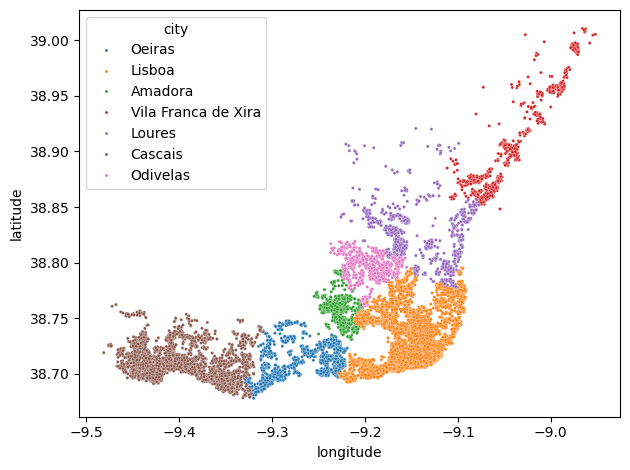

In [39]:
scatter_plot  =  sns.scatterplot(data=df, x='longitude', y='latitude', hue='city', s=5) #legend=False
plt.tight_layout()

plt.savefig('location_city.png', format='png')
plt.show()

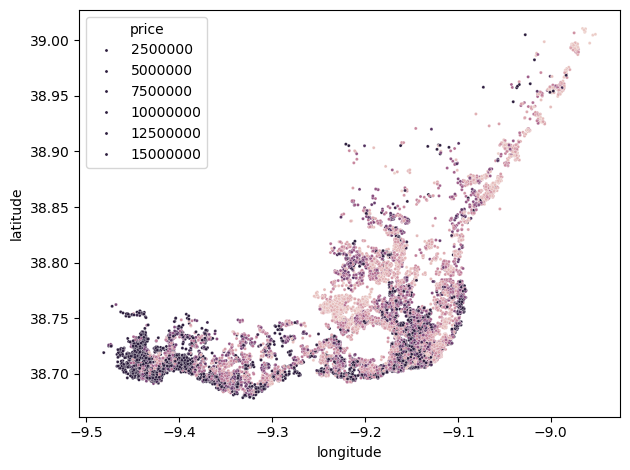

In [40]:
hue_norm = Normalize(vmin=100000, vmax=1000000)
sns.scatterplot(data=df, x='longitude', y='latitude', hue='price', hue_norm=hue_norm, s=5) #legend=False
plt.tight_layout()
plt.savefig('location_price.png', format='png')
plt.show()

## Analysis of Numeric features

### Display columns

In [41]:
df.columns

Index(['numPhotos', 'price', 'propertyType', 'size', 'rooms', 'bathrooms',
       'municipality', 'latitude', 'longitude', 'hasVideo', 'hasPlan',
       'has3DTour', 'has360', 'hasStaging', 'floor', 'description', 'hasLift',
       'parkingSpace', 'highlight', 'city', 'house_status'],
      dtype='object')

### Basic Information

In [42]:
print("Basic Information:")
df.info() #Provides information about the DataFrame including data types and non-null counts.

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17123 entries, 0 to 17122
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   numPhotos     17123 non-null  int64  
 1   price         17123 non-null  int64  
 2   propertyType  17123 non-null  object 
 3   size          17123 non-null  int64  
 4   rooms         17123 non-null  int64  
 5   bathrooms     17123 non-null  int64  
 6   municipality  17123 non-null  object 
 7   latitude      17123 non-null  float64
 8   longitude     17123 non-null  float64
 9   hasVideo      17123 non-null  bool   
 10  hasPlan       17123 non-null  bool   
 11  has3DTour     17123 non-null  bool   
 12  has360        17123 non-null  bool   
 13  hasStaging    17123 non-null  bool   
 14  floor         17123 non-null  int64  
 15  description   8788 non-null   object 
 16  hasLift       17123 non-null  bool   
 17  parkingSpace  17123 non-null  bool   
 18  highlig

In [43]:
#: Shows the shape of the DataFrame (number of rows and columns).
print("\nDataFrame Shape:")
df.shape


DataFrame Shape:


(17123, 21)

### Summary Statistics & column selection

In [57]:
#Generates summary statistics for numeric columns, including count, mean, standard deviation, min, max, and quartiles.

print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,numPhotos,price,size,rooms,bathrooms,latitude,longitude,floor,house_status
count,17123.000000,1.712300e+04,17123.000000,17123.000000,17123.000000,17123.000000,17123.000000,17123.000000,17123.000000
mean,27.662618,8.031136e+05,158.680663,2.763126,2.274368,38.743655,-9.211115,2.112889,0.104421
std,14.313113,8.839655e+05,242.992572,1.485695,1.380548,0.050879,0.107012,2.290756,0.427919
min,5.000000,6.630000e+04,17.000000,0.000000,0.000000,38.678209,-9.481390,-2.000000,-1.000000
25%,18.000000,3.300000e+05,78.000000,2.000000,1.000000,38.709756,-9.246025,0.000000,0.000000
50%,25.000000,5.300000e+05,118.000000,3.000000,2.000000,38.727771,-9.170191,2.000000,0.000000
75%,34.000000,8.900000e+05,188.000000,3.000000,3.000000,38.757282,-9.141720,3.000000,0.000000
max,178.000000,1.500000e+07,22000.000000,45.000000,38.000000,39.010520,-8.951977,34.000000,2.000000


- Some features do not have a gaussian distribution, with a mean value higher than the median (right tail):
  - price, size
  - exceptions: numPhotos, rooms, bathrooms, floor

- Columns to delete
  - latitude (no use)
  - longitude (no use)
  - house_status (categorical, enconded with numbers)

In [45]:
#save numeric column names
numeric_cols = ['numPhotos', 'price', 'size', 'rooms', 'bathrooms', 'floor']

### Missing Values Analysis

In [46]:
print("\nMissing Values Count:")
df.isnull().sum()


Missing Values Count:


numPhotos          0
price              0
propertyType       0
size               0
rooms              0
bathrooms          0
municipality       0
latitude           0
longitude          0
hasVideo           0
hasPlan            0
has3DTour          0
has360             0
hasStaging         0
floor              0
description     8335
hasLift            0
parkingSpace       0
highlight          0
city               0
house_status       0
dtype: int64

### Visualizations

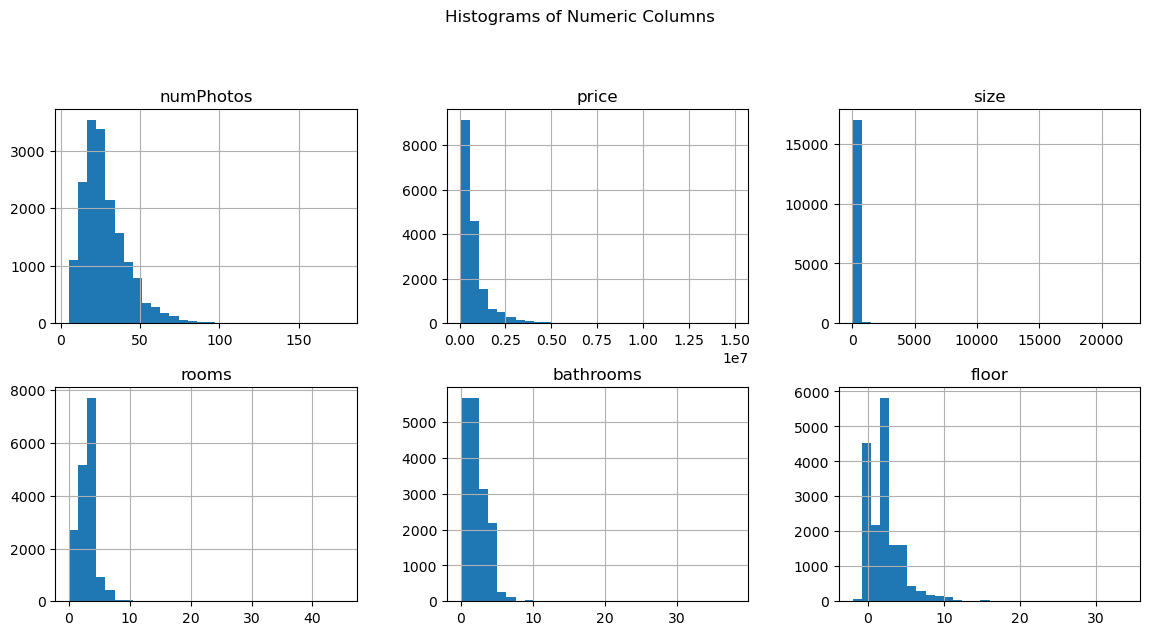

In [47]:
# Histograms for Numeric Columns
df[numeric_cols].hist(figsize=(14, 10), bins=30, layout=(len(numeric_cols) // 3 + 1, 3))
plt.suptitle('Histograms of Numeric Columns')
plt.show()

### Number of Photos

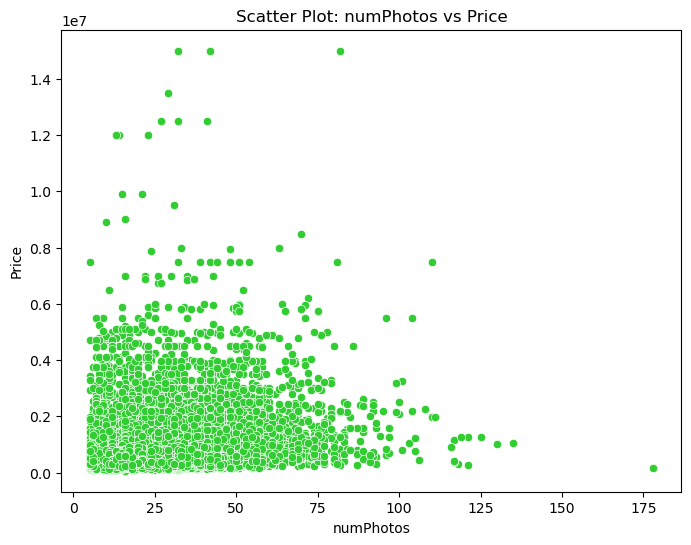

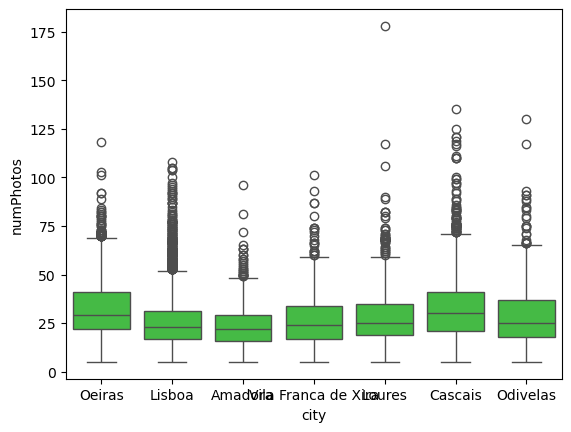

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
Amadora,816.0,23.411765,10.972338,5.0,16.0,22.0,29.0,96.0
Cascais,3518.0,32.319500,15.857742,5.0,21.0,30.0,41.0,135.0
Lisboa,8551.0,25.130160,12.454578,5.0,17.0,23.0,31.0,108.0
Loures,1231.0,28.385865,14.873169,5.0,19.0,25.0,35.0,178.0
Odivelas,794.0,29.110831,16.141174,5.0,18.0,25.0,37.0,130.0
Oeiras,1428.0,32.852941,16.290657,5.0,22.0,29.0,41.0,118.0
Vila Franca de Xira,785.0,26.756688,14.025329,5.0,17.0,24.0,34.0,101.0


In [48]:
col_nr = 0  # numPhotos
column_name = numeric_cols[col_nr]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x=column_name, y='price', color='#32CD32')
plt.title(f'Scatter Plot: {column_name} vs Price')
plt.xlabel(column_name)
plt.ylabel('Price')
plt.show()

sns.boxplot(data=df, x='city',  y= column_name, color='#32CD32') 
plt.show()
df.groupby('city')[column_name].describe()

- correlação positiva entre numPhotos e preço
- alguns posts com número muito elevados de fotos (até 178)
- tendência de cidades mais caras (ver abaixo) terem mais fotos nos anúncios (ex. Caiscais e Oeiras com 29 e 30 fotos/anúncio)

### Price

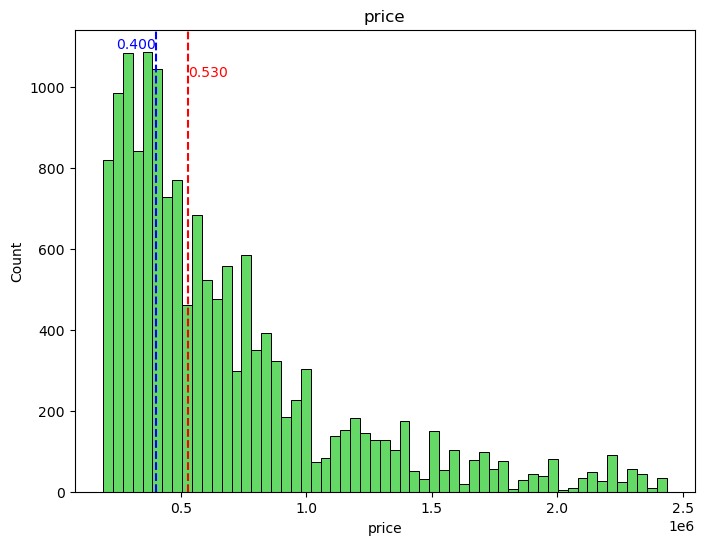

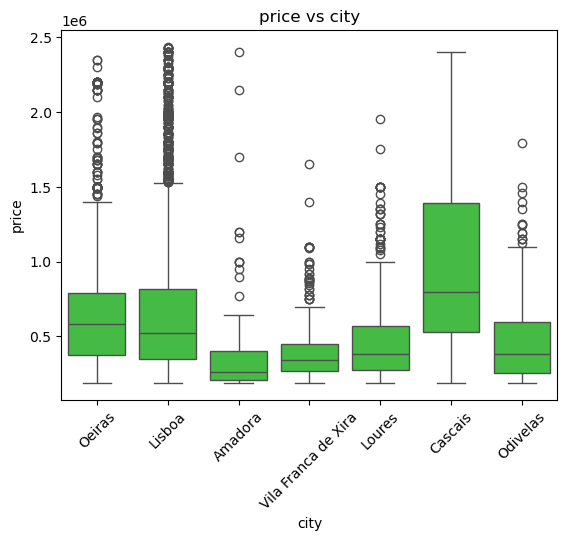

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
Cascais,3518.0,1.403051e+06,1.286392e+06,120000.0,587500.0,970000.0,1800000.0,15000000.0
Oeiras,1428.0,7.674981e+05,8.394375e+05,79000.0,370000.0,589500.0,840000.0,12500000.0
Lisboa,8551.0,7.413222e+05,7.112495e+05,89900.0,349900.0,530000.0,850000.0,9000000.0
Odivelas,794.0,4.309734e+05,2.500466e+05,66300.0,230000.0,359900.0,578750.0,1790000.0
Loures,1231.0,4.394558e+05,2.906842e+05,78000.0,245000.0,350000.0,540000.0,3000000.0
Vila Franca de Xira,785.0,3.357500e+05,2.819074e+05,90000.0,179000.0,270000.0,397950.0,3800000.0
Amadora,816.0,2.867898e+05,2.478402e+05,82500.0,189000.0,217500.0,321250.0,4500000.0


In [64]:
col_nr = 1  # price
column_name = numeric_cols[col_nr]

plt.figure(figsize=(8, 6))
data = df[(df.price > df.price.quantile(0.05) ) & (df.price < df.price.quantile(0.95) )] #to improve plot visualization


#Histogram
sns.histplot(data=data, x=column_name, color='#32CD32')

#add median to graph
mediana = df['price'].median()
plt.axvline(mediana, color='red', linestyle='--', label=f'Mediana: {mediana}')
plt.text(mediana, plt.ylim()[1] * 0.9, f'{int(mediana)/1000000:.3f}', color='red', ha='left')

#add mode to graph
moda = df['price'].mode()[0]
plt.axvline(moda, color='blue', linestyle='--', label=f'Moda: {moda}')
plt.text(moda, plt.ylim()[1] * 0.96, f'{int(moda)/1000000:.3f}', color='blue', ha='right')

plt.title(f'{column_name}')
plt.xlabel(column_name)
plt.show()


#boxplot


sns.boxplot(data=data, x='city',  y= column_name, color='#32CD32') 
plt.title(f'{column_name} vs city')
plt.xticks(rotation=45)
plt.show()
describe_price = df.groupby('city')[column_name].describe().sort_values('50%', ascending=False)
describe_price

- Cascais is the most expensive city of all by a wide margin (median: 970k euro)
- Oeiras and Lisbon the next  most expensive(medians:590k and  530k)
- Odivelas and Loures are next (medians: 360k and  350k)
- Lastly, Vila Franca de Xira and Amadora (medians: 270k and 218k)

- The most expensive house costs 15 million euros, in Cascais

### Size

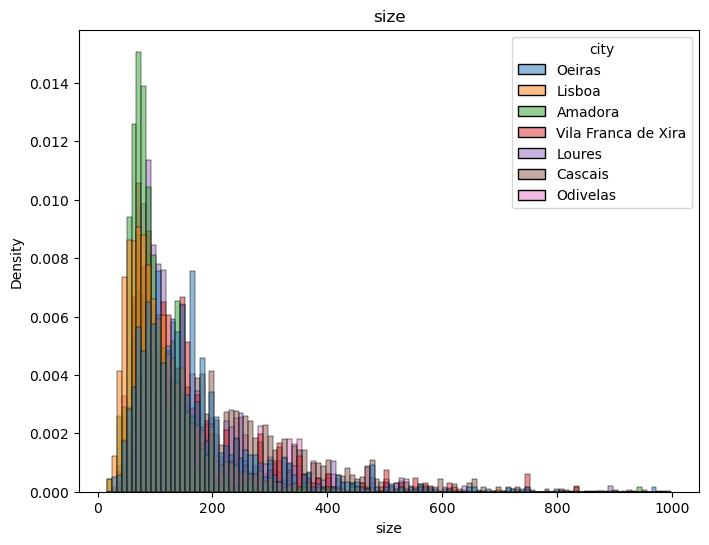

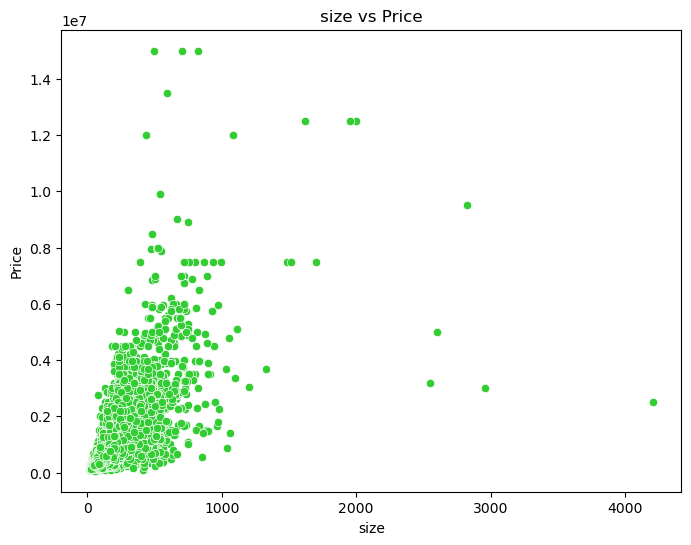

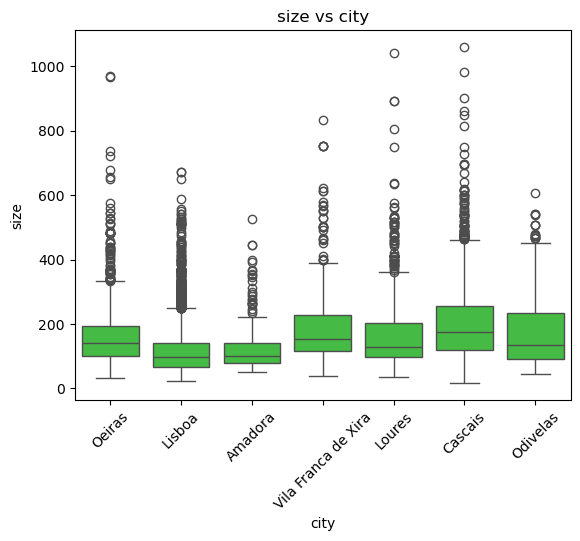

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
Cascais,3518.0,238.963047,232.045379,17.0,127.25,196.0,298.00,9800.0
Oeiras,1428.0,175.490896,143.822798,31.0,99.00,142.0,200.25,2000.0
Odivelas,794.0,176.068010,367.814866,36.0,82.00,128.0,215.75,10090.0
Vila Franca de Xira,785.0,173.611465,295.206963,30.0,85.00,122.0,180.00,6019.0
Loures,1231.0,177.006499,632.186329,35.0,90.00,120.0,192.00,22000.0
Lisboa,8551.0,122.394457,99.069031,17.0,67.00,98.0,146.00,2600.0
Amadora,816.0,104.464461,64.754041,21.0,69.00,86.0,123.25,945.0


In [90]:
col_nr = 2  # size
column_name = numeric_cols[col_nr]


#histogram by city
plt.figure(figsize=(8, 6))
sns.histplot(data=df.query("size<1000"), x='size', hue='city', stat='density', common_norm=False)
plt.ylabel('Density')
plt.title(f'{column_name}')
plt.xlabel(column_name)
plt.show()


#scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df.query("size<5000"), x=column_name, y='price', color='#32CD32')
plt.title(f'{column_name} vs Price')

plt.xlabel(column_name)
plt.ylabel('Price')
plt.show()

#boxplot
data = df[(df.price > df.price.quantile(0.05) ) & (df.price < df.price.quantile(0.95) )]

sns.boxplot(data=data.query("size<5000"), x='city',  y= column_name, color='#32CD32') 
plt.title(f'{column_name} vs city')
plt.xticks(rotation=45)
plt.show()
describe_size = df.groupby('city')[column_name].describe().sort_values('50%', ascending=False)
describe_size

- positive correlation between price and size, as expected
- Cascais and Oeiras still on top
- However, Lisbon has the 2nd to last in house sizes, despite being the 3rd most expensive
> Let's explore the price/m2 ratio

### Price/m2

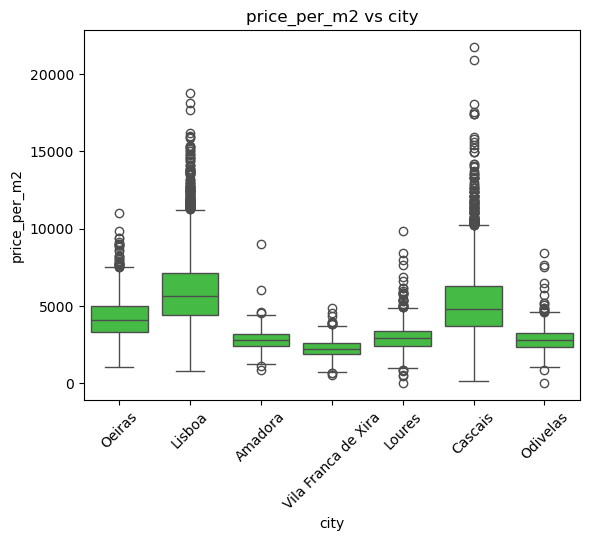

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
Lisboa,8551.0,6024.875458,2210.703225,441.176471,4426.448087,5700.000000,7256.725251,21666.666667
Cascais,3518.0,5910.582317,3108.514873,127.551020,3858.074928,5193.497993,7100.630252,35714.285714
Oeiras,1428.0,4315.646035,1457.492226,1021.341463,3305.310408,4093.841642,5093.029350,13196.480938
Loures,1231.0,2916.238364,910.413534,18.295455,2377.165692,2830.188679,3368.421053,10294.117647
Odivelas,794.0,2842.507725,811.295034,21.803766,2348.357167,2794.117647,3257.575758,8394.160584
Amadora,816.0,2764.102413,667.650938,808.080808,2325.267128,2736.602871,3166.666667,8995.815900
Vila Franca de Xira,785.0,2216.212796,665.842981,30.320651,1851.851852,2176.470588,2561.946903,10000.000000


In [59]:
df['price_per_m2'] = df['price'] / df['size']
column_name = 'price_per_m2'

data = df[(df.price > df.price.quantile(0.05) ) & (df.price < df.price.quantile(0.95) )] #to improve plot visualization

sns.boxplot(data=data, x='city',  y = column_name, color='#32CD32') 
plt.xticks(rotation=45)
plt.title(f'{column_name} vs city')
plt.show()
describe_size = df.groupby('city')[column_name].describe().sort_values('50%', ascending=False)
describe_size

In [51]:
#calculate price/m2 of median values
price_m2_medians = describe_price['50%'] / describe_size['50%']
price_m2_medians.sort_values(ascending=False)


city
Lisboa                 5408.163265
Cascais                4948.979592
Oeiras                 4151.408451
Loures                 2916.666667
Odivelas               2811.718750
Amadora                2529.069767
Vila Franca de Xira    2213.114754
Name: 50%, dtype: float64

- Lisboa is the most expensive (5408 euro/m2)
- the rest of cities loosely follow the price rankings 

### Rooms

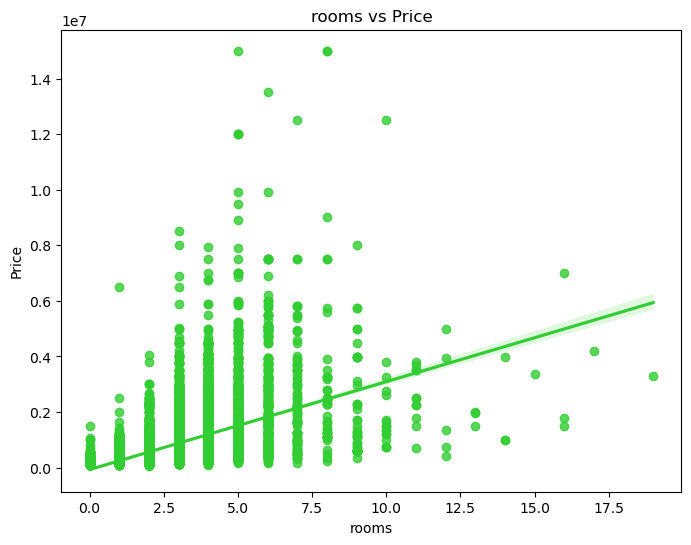

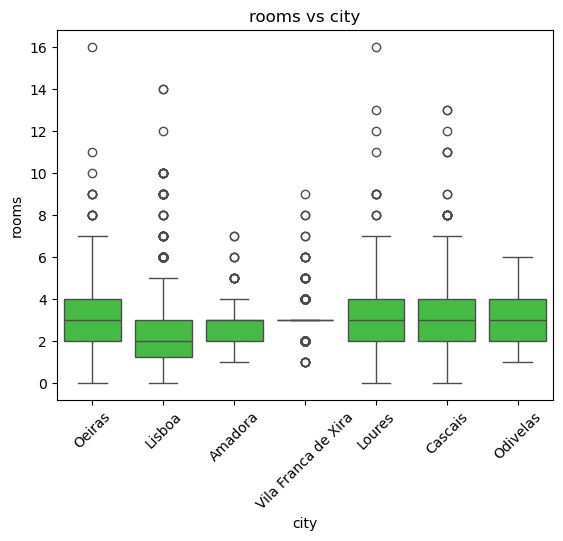

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
Cascais,3518.0,3.414440,1.453844,0.0,3.0,3.0,4.0,19.0
Loures,1231.0,2.952071,1.338052,0.0,2.0,3.0,4.0,16.0
Odivelas,794.0,2.925693,1.070418,0.0,2.0,3.0,4.0,6.0
Oeiras,1428.0,3.062325,1.532057,0.0,2.0,3.0,4.0,28.0
Vila Franca de Xira,785.0,2.898089,1.719429,0.0,2.0,3.0,3.0,32.0
Amadora,816.0,2.425245,0.964041,0.0,2.0,2.0,3.0,7.0
Lisboa,8551.0,2.422758,1.452593,0.0,1.0,2.0,3.0,45.0


In [91]:
col_nr = 3  # rooms
column_name = numeric_cols[col_nr]

plt.figure(figsize=(8, 6))
sns.regplot(data=df.query("rooms<20"), x=column_name, y='price', color='#32CD32')
plt.title(f'{column_name} vs Price')
plt.xlabel(column_name)
plt.ylabel('Price')
plt.show()

data = df[(df.price > df.price.quantile(0.05) ) & (df.price < df.price.quantile(0.95) )]

sns.boxplot(data=data.query("rooms<20"), x='city',  y= column_name, color='#32CD32') 
plt.title(f'{column_name} vs city')
plt.xticks(rotation=45)
plt.show()
df.groupby('city')[column_name].describe().sort_values('50%', ascending=False)

- most cities have a median number of 3 rooms (T3), except for:
  - Lisboa and Amadora, which have 2 rooms (in accordance to the size)

### Bathrooms

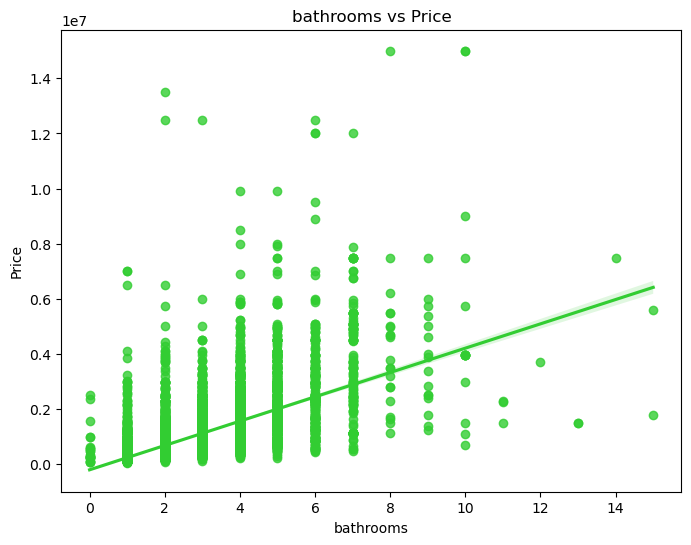

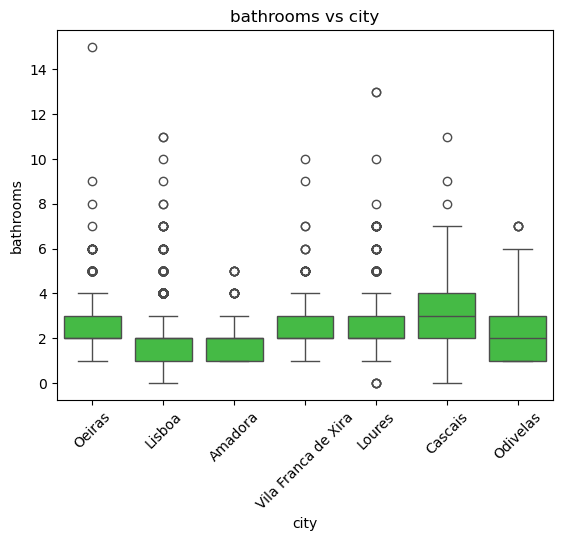

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
Cascais,3518.0,3.180216,1.593431,0.0,2.0,3.0,4.0,20.0
Lisboa,8551.0,1.958952,1.167824,0.0,1.0,2.0,2.0,38.0
Loures,1231.0,2.251828,1.378090,0.0,1.0,2.0,3.0,13.0
Odivelas,794.0,2.171285,1.149980,1.0,1.0,2.0,3.0,7.0
Oeiras,1428.0,2.549720,1.333486,1.0,2.0,2.0,3.0,15.0
Vila Franca de Xira,785.0,2.061146,1.303970,0.0,1.0,2.0,2.0,20.0
Amadora,816.0,1.531863,0.740727,0.0,1.0,1.0,2.0,6.0


In [53]:
col_nr = 4  # bathrooms
column_name = numeric_cols[col_nr]

plt.figure(figsize=(8, 6))
sns.regplot(data=df.query("bathrooms<20"), x=column_name, y='price', color='#32CD32')
plt.title(f'{column_name} vs Price')
plt.xlabel(column_name)
plt.ylabel('Price')
plt.show()

data = df[(df.price > df.price.quantile(0.05) ) & (df.price < df.price.quantile(0.95) )]

sns.boxplot(data=data.query("bathrooms<20"), x='city',  y= column_name, color='#32CD32') 
plt.xticks(rotation=45)
plt.title(f'{column_name} vs city')
plt.show()
df.groupby('city')[column_name].describe().sort_values('50%', ascending=False)

- Almost all cities have a median of 2 bathrooms, except:
  - Cascais, with 3
  - Amadora, with 1

### Floor

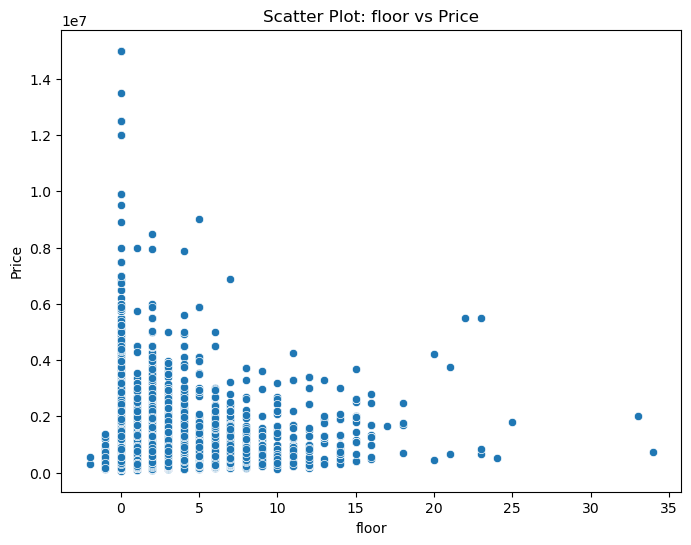

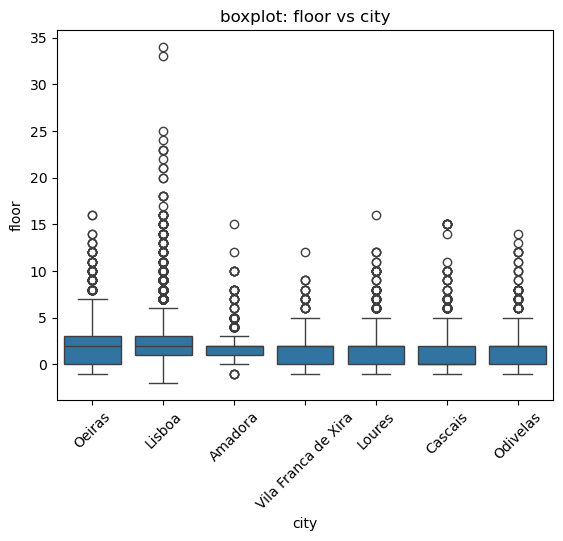

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
Amadora,816.0,2.085784,1.694450,-1.0,1.0,2.0,2.0,15.0
Lisboa,8551.0,2.585312,2.426065,-2.0,1.0,2.0,3.0,34.0
Loures,1231.0,1.956133,2.156034,-1.0,0.0,2.0,2.0,16.0
Odivelas,794.0,2.006297,2.323999,-1.0,0.0,2.0,2.0,14.0
Oeiras,1428.0,2.219888,2.555201,-1.0,0.0,2.0,3.0,16.0
Vila Franca de Xira,785.0,1.578344,1.607314,-1.0,0.0,2.0,2.0,12.0
Cascais,3518.0,1.125640,1.705038,-1.0,0.0,0.0,2.0,15.0


In [54]:
col_nr = 5  # floor
column_name = numeric_cols[col_nr]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df.query("bathrooms<20"), x=column_name, y='price')
plt.title(f'Scatter Plot: {column_name} vs Price')
plt.xlabel(column_name)
plt.ylabel('Price')
plt.show()

sns.boxplot(data=df.query("bathrooms<20"), x='city',  y= column_name) 
plt.xticks(rotation=45)
plt.title(f'boxplot: {column_name} vs city')
plt.show()
df.groupby('city')[column_name].describe().sort_values('50%', ascending=False)

- In almost all cities, the median floor number is 2, except:
  - Caiscais with 0, indicating a majority of chalets

### Correlation

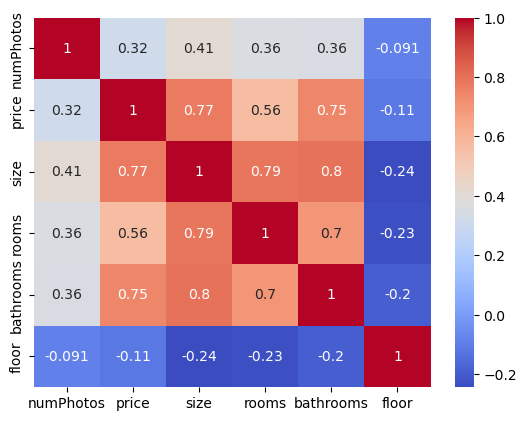

In [55]:
corr = df[numeric_cols].corr(method='spearman') #separman does not assume that the correlation is linear
sns.heatmap(corr, annot=True, cmap='coolwarm')
# Save the figure
plt.savefig('heatmap.png', format='png')

plt.show()

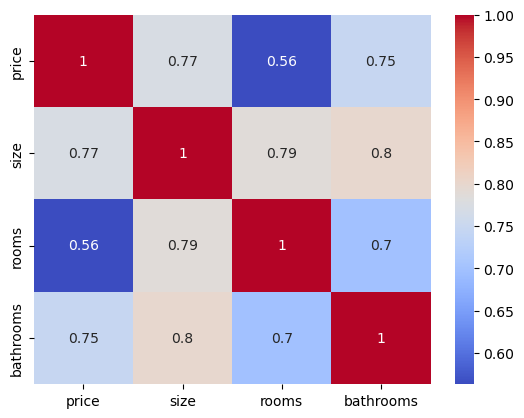

In [56]:
#correlation for presentation
corr = df[numeric_cols[1:-1]].corr(method='spearman') #separman does not assume that the correlation is linear
sns.heatmap(corr, annot=True, cmap='coolwarm')
# Save the figure
plt.savefig('heatmap_presentation.png', format='png')

plt.show()

 - **price** has a fairly strong positive correlation with **size**, no. of **bathrooms**, and moderate positive correlation with no. of **rooms**
 - **floor** is not correlated with any other numerical feature
 - **numPhotos** has a moderate positive correlation with bathrooms, size, and price (0.32-0.41)